In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False


# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [2]:
tel = pd.read_csv('data/tel_data(전처리).csv')

In [3]:
demographics = pd.read_excel('data/Telco_customer_churn_demographics.xlsx')

In [90]:
population = pd.read_excel('data/Telco_customer_churn_population.xlsx')

In [94]:
location = pd.read_excel('data/Telco_customer_churn_location.xlsx')

In [5]:
## 데이터프레임을 넣고 column별 특성 및 결측값, 고유값들을 확인하는 함수를 작성해본다.
## 필수는 아니지만 전체적인 흐름을 파악하기 쉬워진다.

def resumetable(df):
  print(f'데이터셋 크기: {df.shape}')                                # 데이터프레임의 전체 크기(행, 열) 출력

  summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])         # 각 피처의 데이터 타입을 가져와 데이터프레임으로 생성
  summary = summary.reset_index()                                    # 인덱스를 초기화하여 컬럼으로 변환
  summary = summary.rename(columns={'index':'피처'})                 # 'index' 컬럼명을 '피처'로 변경

  summary['결측값 개수'] = df.isnull().sum().values                 # 각 피처의 결측값(null) 개수 계산
  summary['고유값 개수'] = df.nunique().values                      # 각 피처의 고유값 개수 계산

  summary['첫 번째 값'] = df.loc[0].values                          # 각 피처의 첫 번째 샘플 값
  summary['두 번째 값'] = df.loc[1].values                          # 각 피처의 두 번째 샘플 값
  summary['세 번째 값'] = df.loc[2].values                          # 각 피처의 세 번째 샘플 값

  return summary                                                     # 요약 테이블 반환

In [6]:
# resumetable(population)

In [68]:
tel

,고객ID,성별,고령자여부,배우자여부,부양가족여부,가입개월수,전화서비스가입여부,복수회선여부,인터넷서비스유형,온라인보안서비스여부,...,TV스트리밍이용여부,영화스트리밍이용여부,계약기간유형,전자청구서이용여부,결제방법,월요금,총요금,이탈여부,인터넷서비스가입여부,개월수*월요금
0,7590-VHVEG,False,False,True,False,1,False,False,DSL,False,...,False,False,Month-to-month,True,Electronic check,29.85,29.85,False,True,29.85
1,5575-GNVDE,True,False,False,False,34,True,False,DSL,True,...,False,False,One year,False,Mailed check,56.95,1889.50,False,True,1936.30
2,3668-QPYBK,True,False,False,False,2,True,False,DSL,True,...,False,False,Month-to-month,True,Mailed check,53.85,108.15,True,True,107.70
3,7795-CFOCW,True,False,False,False,45,False,False,DSL,True,...,False,False,One year,False,Bank transfer (automatic),42.30,1840.75,False,True,1903.50
4,9237-HQITU,False,False,False,False,2,True,False,Fiber optic,False,...,False,False,Month-to-month,True,Electronic check,70.70,151.65,True,True,141.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,True,False,True,True,24,True,True,DSL,True,...,True,True,One year,True,Mailed check,84.80,1990.50,False,True,2035.20
7039,2234-XADUH,False,False,True,True,72,True,True,Fiber optic,False,...,True,True,One year,True,Credit card (automatic),103.20,7362.90,False,True,7430.40
7040,4801-JZAZL,False,False,True,True,11,False,False,DSL,True,...,False,False,Month-to-month,True,Electronic check,29.60,346.45,False,True,325.60
7041,8361-LTMKD,True,True,True,False,4,True,True,Fiber optic,False,...,False,False,Month-to-month,True,Mailed check,74.40,306.60,True,True,297.60


In [7]:
# demographics 컬럼명 한글로 변경
demographics.rename(columns={
    'Customer ID': '고객ID',
    'Count': '카운트',
    'Gender': '성별',
    'Age': '나이',
    'Under 30': '30세미만여부',
    'Senior Citizen': '고령자여부',
    'Married': '결혼여부',
    'Dependents': '부양가족여부',
    'Number of Dependents': '부양가족수'
}, inplace=True)

In [8]:
demographics

,고객ID,카운트,성별,나이,30세미만여부,고령자여부,결혼여부,부양가족여부,부양가족수
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1
...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,Female,30,No,No,No,No,0
7039,6840-RESVB,1,Male,38,No,No,Yes,Yes,2
7040,2234-XADUH,1,Female,30,No,No,Yes,Yes,2
7041,4801-JZAZL,1,Female,32,No,No,Yes,Yes,2


In [126]:
# population 컬럼명 한글로 변경
population.rename(columns={
    'ID': '고유ID',
    'Zip Code': '우편번호',
    'Population': '지역인구수'
}, inplace=True)

In [128]:
# location 컬럼명 한글로 변경


In [130]:
population

,고유ID,우편번호,지역인구수
0,1,90001,54492
1,2,90002,44586
2,3,90003,58198
3,4,90004,67852
4,5,90005,43019
...,...,...,...
1666,1667,96145,4002
1667,1668,96146,942
1668,1669,96148,678
1669,1670,96150,33038


In [100]:
location.rename(columns={
    'Customer ID': '고객ID',
    'Count': '중복여부',
    'Country': '국가',
    'State': '주',
    'City': '도시',
    'Zip Code': '우편번호',
    'Lat Long': '위경도',
    'Latitude': '위도',
    'Longitude': '경도'
}, inplace=True)

In [102]:
location

,고객ID,중복여부,국가,주,도시,우편번호,위경도,위도,경도
0,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582
1,7495-OOKFY,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237
2,1658-BYGOY,1,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715
3,4598-XLKNJ,1,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639
4,4846-WHAFZ,1,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188
...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330


In [11]:
# 카운트
demographics.drop(columns=['카운트'], inplace=True)
demographics

,고객ID,성별,나이,30세미만여부,고령자여부,결혼여부,부양가족여부,부양가족수
0,8779-QRDMV,Male,78,No,Yes,No,No,0
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1
...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,30,No,No,No,No,0
7039,6840-RESVB,Male,38,No,No,Yes,Yes,2
7040,2234-XADUH,Female,30,No,No,Yes,Yes,2
7041,4801-JZAZL,Female,32,No,No,Yes,Yes,2


In [26]:
# 🔎 결측치 확인
print("🔍 [결측치 개수]")
print("▶ demographics 결측치:\n", demographics.isnull().sum())
print("\n▶ population 결측치:\n", population.isnull().sum())

🔍 [결측치 개수]
▶ demographics 결측치:
 고객ID       0
성별         0
나이         0
30세미만여부    0
고령자여부      0
결혼여부       0
부양가족여부     0
부양가족수      0
dtype: int64

▶ population 결측치:
 고유ID     0
우편번호     0
지역인구수    0
dtype: int64


In [50]:
# 🔎 빈 문자열 확인
print("\n🔍 [빈 문자열 개수]")
print("▶ demographics 빈 문자열:\n", (demographics == '').sum())
print("\n▶ population 빈 문자열:\n", (population == '').sum())


🔍 [빈 문자열 개수]
▶ demographics 빈 문자열:
 고객ID       0
성별         0
나이         0
30세미만여부    0
고령자여부      0
결혼여부       0
부양가족여부     0
부양가족수      0
dtype: int64

▶ population 빈 문자열:
 고유ID     0
우편번호     0
지역인구수    0
dtype: int64


In [32]:
# 🔎 중복 수 확인
print("▶ demographics 고객ID 중복 수:", demographics['고객ID'].duplicated().sum())
print("▶ population 우편번호 중복 수:", population['우편번호'].duplicated().sum())

▶ demographics 고객ID 중복 수: 0
▶ population 우편번호 중복 수: 0


In [34]:
# 🔎 데이터 타입
print("▶ demographics dtypes\n", demographics.dtypes)
print("\n▶ population dtypes\n", population.dtypes)

▶ demographics dtypes
 고객ID       object
성별         object
나이          int64
30세미만여부    object
고령자여부      object
결혼여부       object
부양가족여부     object
부양가족수       int64
dtype: object

▶ population dtypes
 고유ID     int64
우편번호     int64
지역인구수    int64
dtype: object


In [40]:
# 🔎 이상값 확인
print("▶ demographics 나이 최소/최대:", demographics['나이'].min(), "/", demographics['나이'].max())
print("▶ 부양가족수 분포:\n", demographics['부양가족수'].value_counts())

print("\n▶ 지역인구수 최소/최대:", population['지역인구수'].min(), "/", population['지역인구수'].max())


▶ demographics 나이 최소/최대: 19 / 80
▶ 부양가족수 분포:
 부양가족수
0    5416
1     553
2     531
3     517
5      10
4       9
6       3
7       2
8       1
9       1
Name: count, dtype: int64

▶ 지역인구수 최소/최대: 11 / 105285


In [46]:
# 🔎 분포
print("▶ 성별 분포:\n", demographics['성별'].value_counts())
print("▶ 고령자여부 분포:\n", demographics['고령자여부'].value_counts())
print("▶ 결혼여부 분포:\n", demographics['결혼여부'].value_counts())

▶ 성별 분포:
 성별
Male      3555
Female    3488
Name: count, dtype: int64
▶ 고령자여부 분포:
 고령자여부
No     5901
Yes    1142
Name: count, dtype: int64
▶ 결혼여부 분포:
 결혼여부
No     3641
Yes    3402
Name: count, dtype: int64


In [64]:
# 값 치환 / 타입 변환 --> 경고 내용 : 이제 알아서 타입 변경 안해줄거다.
demographics['성별'] = demographics['성별'].replace({'Male': True, 'Female': False})
demographics['성별'] = demographics['성별'].astype(bool)

demographics['30세미만여부'] = demographics['30세미만여부'].replace({'Yes': True, 'No': False})
demographics['30세미만여부'] = demographics['30세미만여부'].astype(bool)

demographics['고령자여부'] = demographics['고령자여부'].replace({'Yes': True, 'No': False})
demographics['고령자여부'] = demographics['고령자여부'].astype(bool)

demographics['결혼여부'] = demographics['결혼여부'].replace({'Yes': True, 'No': False})
demographics['결혼여부'] = demographics['결혼여부'].astype(bool)

demographics['부양가족여부'] = demographics['부양가족여부'].replace({'Yes': True, 'No': False})
demographics['부양가족여부'] = demographics['부양가족여부'].astype(bool)

In [108]:
demographics

,고객ID,성별,나이,30세미만여부,고령자여부,결혼여부,부양가족여부,부양가족수
0,8779-QRDMV,True,78,False,True,False,False,0
1,7495-OOKFY,False,74,False,True,True,True,1
2,1658-BYGOY,True,71,False,True,False,True,3
3,4598-XLKNJ,False,78,False,True,True,True,1
4,4846-WHAFZ,False,80,False,True,True,True,1
...,...,...,...,...,...,...,...,...
7038,2569-WGERO,False,30,False,False,False,False,0
7039,6840-RESVB,True,38,False,False,True,True,2
7040,2234-XADUH,False,30,False,False,True,True,2
7041,4801-JZAZL,False,32,False,False,True,True,2


In [170]:
# tel의 고객 ID를 이용하여 demographics 와 병합
# tel에서 고객ID와 이탈여부만 추출
tel_churn = tel[['고객ID', '이탈여부']]

# 고객ID 기준 병합
demo_with_churn = demographics.merge(tel_churn, on='고객ID', how='left')
demo_with_churn

,고객ID,성별,나이,30세미만여부,고령자여부,결혼여부,부양가족여부,부양가족수,이탈여부
0,8779-QRDMV,True,78,False,True,False,False,0,True
1,7495-OOKFY,False,74,False,True,True,True,1,True
2,1658-BYGOY,True,71,False,True,False,True,3,True
3,4598-XLKNJ,False,78,False,True,True,True,1,True
4,4846-WHAFZ,False,80,False,True,True,True,1,True
...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,False,30,False,False,False,False,0,False
7039,6840-RESVB,True,38,False,False,True,True,2,False
7040,2234-XADUH,False,30,False,False,True,True,2,False
7041,4801-JZAZL,False,32,False,False,True,True,2,False


In [180]:
# tel에서 고객ID와 이탈여부 추출
tel_churn = tel[['고객ID', '이탈여부']]

# location에서 고객ID와 우편번호 추출
location_zip = location[['고객ID', '우편번호']]

# tel + location 병합 (고객ID 기준)
tel_with_zip = tel_churn.merge(location_zip, on='고객ID', how='left')

# tel_with_zip + population 병합 (우편번호 기준)
pop_with_churn = tel_with_zip.merge(population, on='우편번호', how='left')

In [182]:
pop_with_churn = pop_with_churn[
    ['고유ID', '고객ID', '우편번호', '지역인구수', '이탈여부']
]

In [186]:
pop_with_churn

,고유ID,고객ID,우편번호,지역인구수,이탈여부
0,1,7590-VHVEG,90001,54492,False
1,2,5575-GNVDE,90002,44586,False
2,3,3668-QPYBK,90003,58198,True
3,4,7795-CFOCW,90004,67852,False
4,5,9237-HQITU,90005,43019,True
...,...,...,...,...,...
7038,432,6840-RESVB,92301,18980,False
7039,433,2234-XADUH,92304,42,False
7040,434,4801-JZAZL,92305,301,False
7041,328,8361-LTMKD,92028,42239,True


In [76]:
# tel의 상관계수 행렬 계산
numeric_tel = tel.select_dtypes(include=['number', 'bool'])
tel_correlation_matrix = numeric_tel.corr()

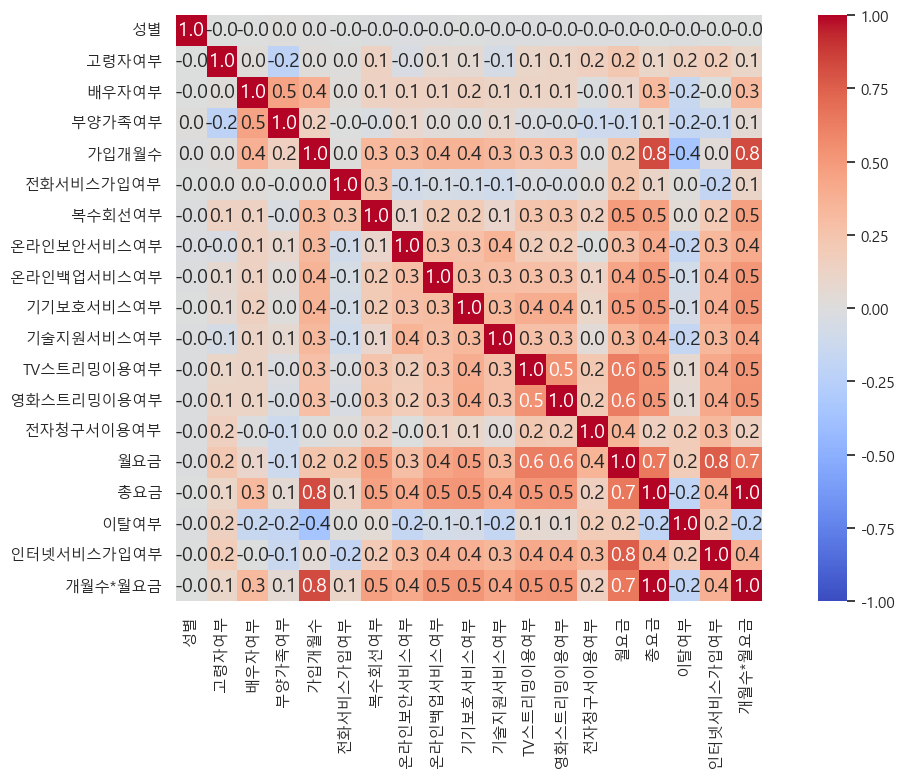

In [80]:
# tel 상관계수 히트맵 시각화
plt.figure(figsize=(12, 8))  # 그래프 크기 설정
sns.heatmap(
    tel_correlation_matrix,
    annot=True,        # 셀 안에 숫자 표시
    fmt=".1f",         # 소수점 1자리까지만 표시
    cmap='coolwarm',   # 음/양 상관을 직관적으로 보여주는 색상
    square=True,       # 셀을 정사각형으로 유지
    vmin=-1, vmax=1    # 색상 범위 고정 (모든 히트맵 비교를 위한 기준)
)
plt.tight_layout()     # 레이아웃 자동 정렬
plt.show()

In [166]:
# demographics과 이탈여부의 상관계수 행렬 계산
numeric_demo_with_churn = demo_with_churn.select_dtypes(include=['number', 'bool'])
demo_with_churn_correlation_matrix = numeric_demo_with_churn.corr()

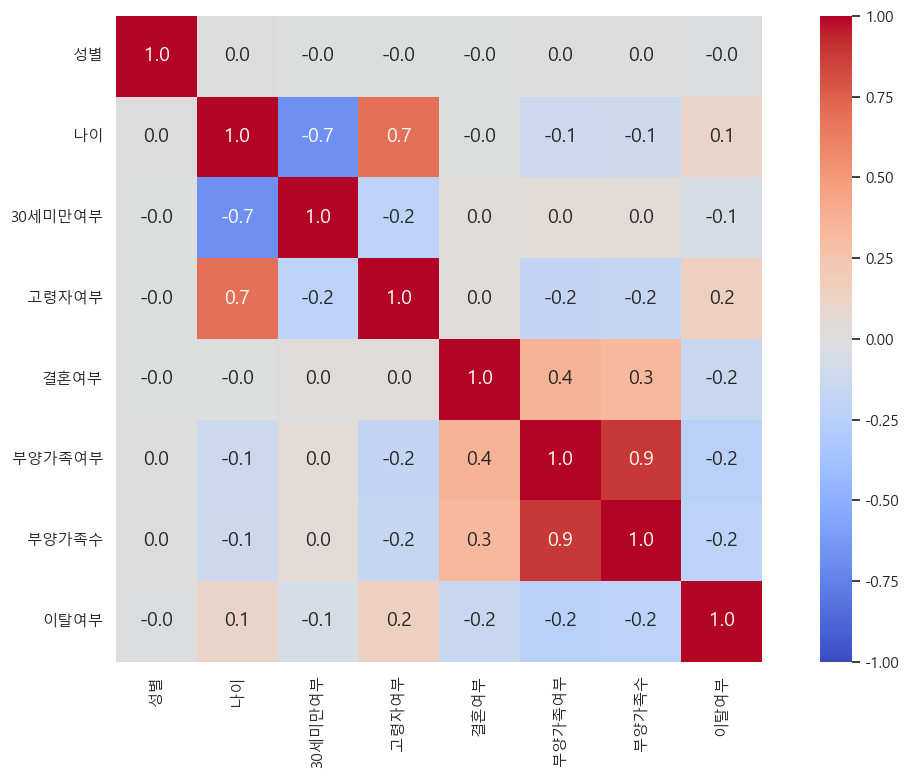

In [178]:
# demographics 상관계수 히트맵 시각화
plt.figure(figsize=(12, 8))  # 그래프 크기 설정
sns.heatmap(
    demo_with_churn_correlation_matrix,
    annot=True,        # 셀 안에 숫자 표시
    fmt=".1f",         # 소수점 1자리까지만 표시
    cmap='coolwarm',   # 음/양 상관을 직관적으로 보여주는 색상
    square=True,       # 셀을 정사각형으로 유지
    vmin=-1, vmax=1    # 색상 범위 고정 (모든 히트맵 비교를 위한 기준)
)
plt.tight_layout()     # 레이아웃 자동 정렬
plt.show()

In [188]:
# population 와 이탈여부의 상관계수 행렬 계산
numeric_pop_with_churn = pop_with_churn.select_dtypes(include=['number', 'bool'])
pop_with_churn_correlation_matrix = numeric_pop_with_churn.corr()

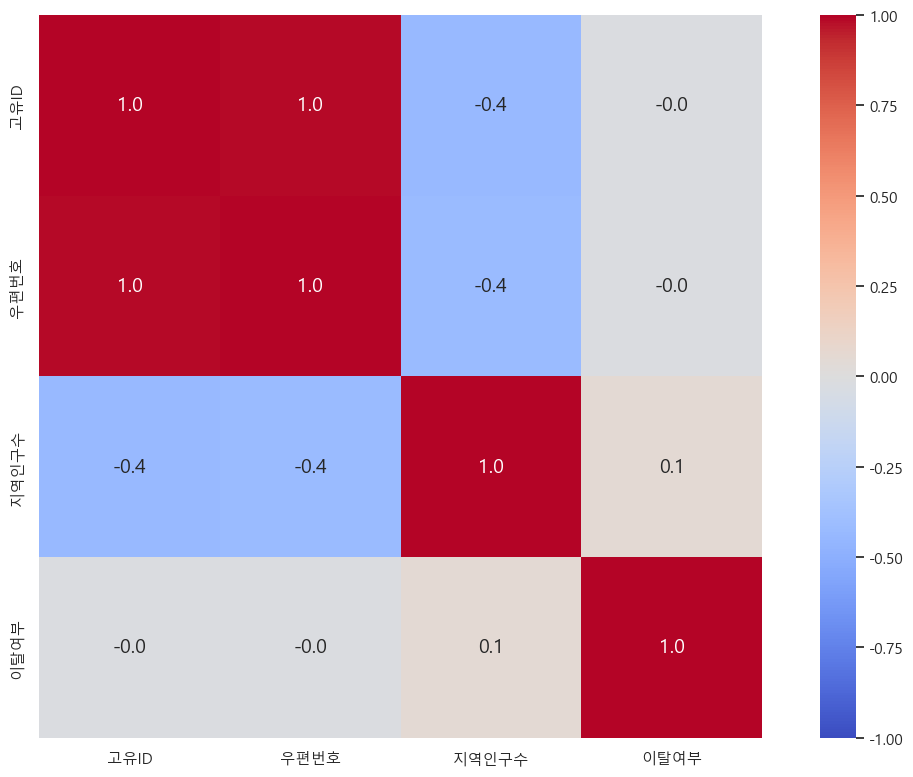

In [190]:
# population 상관계수 히트맵 시각화
plt.figure(figsize=(12, 8))  # 그래프 크기 설정
sns.heatmap(
    pop_with_churn_correlation_matrix,
    annot=True,        # 셀 안에 숫자 표시
    fmt=".1f",         # 소수점 1자리까지만 표시
    cmap='coolwarm',   # 음/양 상관을 직관적으로 보여주는 색상
    square=True,       # 셀을 정사각형으로 유지
    vmin=-1, vmax=1    # 색상 범위 고정 (모든 히트맵 비교를 위한 기준)
)
plt.tight_layout()     # 레이아웃 자동 정렬
plt.show()